# Unsupervised ML (Clustering)

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

**4.1 Create 3 clusters as below.**

**1. Sensitive Area**

In [1]:
# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading csv file and importing into Jupyter notebook for further processing.

In [4]:
crime = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [5]:
crime.shape

(9017, 33)

In [6]:
# check for null/missing values

In [7]:
crime.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

No null/missing values present.

In [10]:
totals = crime[crime['DISTRICT'] == 'TOTAL'].index
ut_total = crime[crime['DISTRICT'] == 'DELHI UT TOTAL'].index

In [12]:
crime.drop(totals, axis = 0 ,inplace = True)
crime.drop(ut_total, axis = 0 ,inplace = True)

In [13]:
crime.reset_index(drop = True, inplace = True)

In [14]:
crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [15]:
# Seperating values for clustering

In [16]:
x = crime.iloc[:,2:]
x

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,...,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,...,38,2088,14,112,83,186,0,404,1262,5818
3,2001,80,53,1,20,0,20,25,20,5,...,23,795,17,126,38,57,0,233,1181,3140
4,2001,82,67,1,23,0,23,49,26,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,2012,52,37,10,79,0,79,454,256,198,...,18,227,18,53,6,327,0,292,1144,5558
8594,2012,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,2012,5,6,2,6,0,6,2,2,0,...,1,186,0,2,0,1,0,44,392,787


In [18]:
kmeans = KMeans(n_clusters = 3,init='k-means++')
ymeans = kmeans.fit_predict(x)
ymeans

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [19]:
# Centre of cluster

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [21]:
# Sensitive Area

In [22]:
x[ymeans == 2]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
133,2001,90,58,60,39,0,39,143,117,26,...,2,1311,7,54,27,530,0,0,6129,13496
244,2001,221,327,5,40,0,40,152,56,96,...,3,3735,40,223,51,229,0,38,11106,27254
276,2001,44,67,7,38,0,38,20,7,13,...,25,1756,3,162,3,161,0,0,9669,14843
294,2001,61,109,0,106,0,106,55,48,7,...,8,652,15,252,56,132,0,272,9372,13708
307,2001,111,133,1,84,0,84,50,35,15,...,29,1306,25,215,63,161,0,269,6567,13063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2012,123,172,3,173,0,173,54,42,12,...,64,1064,24,405,114,448,0,452,11819,21091
8231,2012,215,170,9,232,0,232,212,141,71,...,86,3939,11,614,235,388,0,621,6423,30508
8405,2012,180,219,4,94,0,94,87,65,22,...,10,1412,12,90,141,237,0,1411,12131,19881
8542,2012,224,8,28,244,0,244,419,419,0,...,15,234,45,83,0,1666,0,70,7641,14370


**2. Moderate Area**

In [24]:
x[ymeans == 0]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,...,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,...,38,2088,14,112,83,186,0,404,1262,5818
4,2001,82,67,1,23,0,23,49,26,23,...,41,1244,12,109,58,247,0,431,2313,6507
6,2001,182,88,2,54,0,54,82,51,31,...,43,1792,7,139,129,378,0,369,2426,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2012,39,19,3,70,0,70,245,134,111,...,4,101,17,59,36,68,0,25,1651,5045
8590,2012,46,69,6,116,0,116,538,306,232,...,11,252,11,160,43,123,0,218,2004,7040
8591,2012,47,48,6,87,0,87,399,244,155,...,6,131,18,69,21,207,0,4,1387,4085
8593,2012,52,37,10,79,0,79,454,256,198,...,18,227,18,53,6,327,0,292,1144,5558


**Peaceful Area**

In [26]:
x[ymeans == 1]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
3,2001,80,53,1,20,0,20,25,20,5,...,23,795,17,126,38,57,0,233,1181,3140
5,2001,3,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
13,2001,101,56,12,35,0,35,26,20,6,...,37,1367,26,100,25,192,0,335,454,3532
19,2001,6,0,0,0,0,0,0,0,0,...,0,17,1,0,1,0,0,6,68,439
20,2001,38,10,4,8,0,8,12,12,0,...,34,679,6,38,47,108,0,167,926,2572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,9,6,1,5,0,5,28,13,15,...,1,16,0,29,7,4,0,67,302,1057
8585,2012,25,17,2,14,0,14,153,84,69,...,3,92,6,29,10,70,0,13,927,2700
8592,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8594,2012,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


**4.2 Create DataFrame for each cluster that shows data according to the areas.**

In [27]:
sen_area = x[ymeans == 2]
sense = pd.DataFrame(sen_area)
sense

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
133,2001,90,58,60,39,0,39,143,117,26,...,2,1311,7,54,27,530,0,0,6129,13496
244,2001,221,327,5,40,0,40,152,56,96,...,3,3735,40,223,51,229,0,38,11106,27254
276,2001,44,67,7,38,0,38,20,7,13,...,25,1756,3,162,3,161,0,0,9669,14843
294,2001,61,109,0,106,0,106,55,48,7,...,8,652,15,252,56,132,0,272,9372,13708
307,2001,111,133,1,84,0,84,50,35,15,...,29,1306,25,215,63,161,0,269,6567,13063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2012,123,172,3,173,0,173,54,42,12,...,64,1064,24,405,114,448,0,452,11819,21091
8231,2012,215,170,9,232,0,232,212,141,71,...,86,3939,11,614,235,388,0,621,6423,30508
8405,2012,180,219,4,94,0,94,87,65,22,...,10,1412,12,90,141,237,0,1411,12131,19881
8542,2012,224,8,28,244,0,244,419,419,0,...,15,234,45,83,0,1666,0,70,7641,14370


In [28]:
mod_area = x[ymeans == 0]
mode = pd.DataFrame(mod_area)
mode

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,...,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,...,38,2088,14,112,83,186,0,404,1262,5818
4,2001,82,67,1,23,0,23,49,26,23,...,41,1244,12,109,58,247,0,431,2313,6507
6,2001,182,88,2,54,0,54,82,51,31,...,43,1792,7,139,129,378,0,369,2426,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2012,39,19,3,70,0,70,245,134,111,...,4,101,17,59,36,68,0,25,1651,5045
8590,2012,46,69,6,116,0,116,538,306,232,...,11,252,11,160,43,123,0,218,2004,7040
8591,2012,47,48,6,87,0,87,399,244,155,...,6,131,18,69,21,207,0,4,1387,4085
8593,2012,52,37,10,79,0,79,454,256,198,...,18,227,18,53,6,327,0,292,1144,5558


In [29]:
peace_area = x[ymeans == 1]
peace = pd.DataFrame(peace_area)
peace

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
3,2001,80,53,1,20,0,20,25,20,5,...,23,795,17,126,38,57,0,233,1181,3140
5,2001,3,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
13,2001,101,56,12,35,0,35,26,20,6,...,37,1367,26,100,25,192,0,335,454,3532
19,2001,6,0,0,0,0,0,0,0,0,...,0,17,1,0,1,0,0,6,68,439
20,2001,38,10,4,8,0,8,12,12,0,...,34,679,6,38,47,108,0,167,926,2572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,9,6,1,5,0,5,28,13,15,...,1,16,0,29,7,4,0,67,302,1057
8585,2012,25,17,2,14,0,14,153,84,69,...,3,92,6,29,10,70,0,13,927,2700
8592,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8594,2012,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


In [30]:
crime['Area Type'] = pd.DataFrame(kmeans.labels_)
crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Area Type
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,1
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,1
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,1


In [31]:
# Cluster plotting

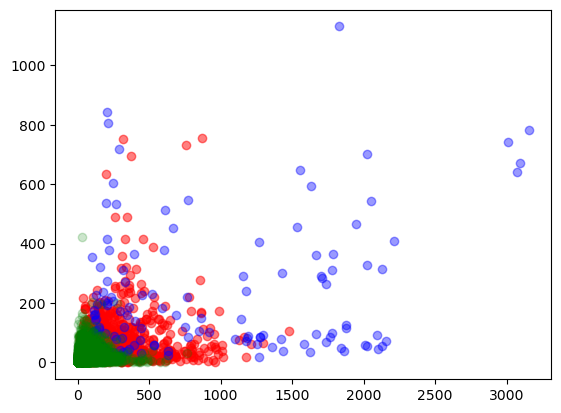

In [32]:
plt.scatter(crime[ymeans == 0]['CHEATING'],crime[ymeans == 0]['ROBBERY'], c= 'r',alpha = 0.5)
plt.scatter(crime[ymeans == 2]['CHEATING'],crime[ymeans == 2]['ROBBERY'], c= 'b',alpha = 0.4)
plt.scatter(crime[ymeans == 1]['CHEATING'],crime[ymeans == 1]['ROBBERY'], c= 'g',alpha = 0.2)

In [33]:
# Saving into csv

In [34]:
crime.to_csv('crimebyarea.csv')

In [35]:
# Saving model

In [36]:
import joblib

In [37]:
joblib.dump(kmeans,'areacluster.obj')
kmodel = joblib.load('areacluster.obj')

In [38]:
kmodel

KMeans(n_clusters=3)

**4.3 Analyze your clusters and prepare a report that explains all your observations.**

**1. What is impacting more crimes in sensitive areas.**

This study explores the variables affecting crime rates in high-crime locations, concentrating on the frequency of theft, hurt/grievous hurt, and other crimes under the Indian Penal Code.

* Sensitive regions frequently experience greater rates of crime, which presents difficulties for the community and law enforcement. It is essential to comprehend the particular types of crime that predominate in these locations in order to execute focused interventions. To offer light on the dynamics at play, we look at stealing, hurt/grievous hurt, and other IPC offenses in this paper.

* Theft becomes a serious issue in delicate locations. High theft rates can be caused by a variety of factors, such as unemployment, ineffective surveillance, and socioeconomic differences. People who are desperate and impoverished may turn to thievery as a method of subsistence. Inadequate community involvement and enforcement may also make the issue worse.

* Boost community policing programs to foster collaboration and trust. Improve the infrastructure for surveillance by implementing technology. Put social welfare policies into action to reduce inequality in wealth. 

* The high frequency of crimes involving hurt or grievous hurt points to a possible uptick in violent incidents in delicate regions. This may be related to things like gang activity, interpersonal conflicts, and restricted access to high-quality medical treatment. Communities that are tense may foster an atmosphere where physical altercations turn into more serious crimes.

* Boost police patrols and presence in designated hotspots. Encourage community-based dispute resolution initiatives. Improve healthcare facilities to guarantee victims receive timely care. 

* In addition to theft and bodily injury, other IPC offenses are frequently more common in sensitive places. These can include a broad variety of offenses, such as property damage, vandalism, and crimes against public order. These crimes could be signs of more serious problems including drug misuse, societal unrest, and a lack of educational possibilities.

* Put in place community-based drug abuse recovery programs. Expand chances for education and career training. Boost neighborhood organizations to deal with deeper societal problems.


**2. What needs to be done to reduce crime.**

* Foster a sense of trust and collaboration between law enforcement and local communities.

* To address the underlying causes of crime, make investments in education, job opportunities, and vocational training.
 
* Put social welfare programs into place to help disadvantaged groups and reduce poverty.

* Improve mental health and drug abuse services, minimizing the connections between addiction and criminal activity.

* Create mentorship and outreach initiatives for young people, providing constructive alternatives to criminality.

* Make use of technology, data-driven policing, and de-escalation and community-focused officer training.

* Assess sentence guidelines, encourage non-incarceration options, and deal with institutionalized prejudices in the criminal justice system.

* Encourage cooperation across government agencies, law enforcement, and community organizations.

* Inform the people about the repercussions of crime and promote community participation in attempts to avoid it.

* Implement restorative justice initiatives that prioritize mending wrongs, dealing with underlying problems, and reintegrating offenders into society.

In [40]:
dis = crime.groupby(['TOTAL IPC CRIMES','Area Type','DISTRICT','STATE/UT'], sort = True).size().reset_index()
dis.head()

,TOTAL IPC CRIMES,Area Type,DISTRICT,STATE/UT,0
0,0,1,S.T.F.,DELHI UT,2
1,1,1,CID,MANIPUR,1
2,1,1,G.R.P.,HIMACHAL PRADESH,1
3,2,1,CID,HIMACHAL PRADESH,2
4,2,1,CID,MANIPUR,4


In [41]:
dis.tail()

,TOTAL IPC CRIMES,Area Type,DISTRICT,STATE/UT,0
8442,32380,2,BANGALORE COMMR.,KARNATAKA,1
8443,32647,2,MUMBAI COMMR.,MAHARASHTRA,1
8444,32770,2,MUMBAI COMMR.,MAHARASHTRA,1
8445,33932,2,MUMBAI COMMR.,MAHARASHTRA,1
8446,34638,2,ERNAKULAM RURAL,KERALA,1


In [44]:
# Top 10 safest Districts

<Axes: xlabel='DISTRICT', ylabel='TOTAL IPC CRIMES'>

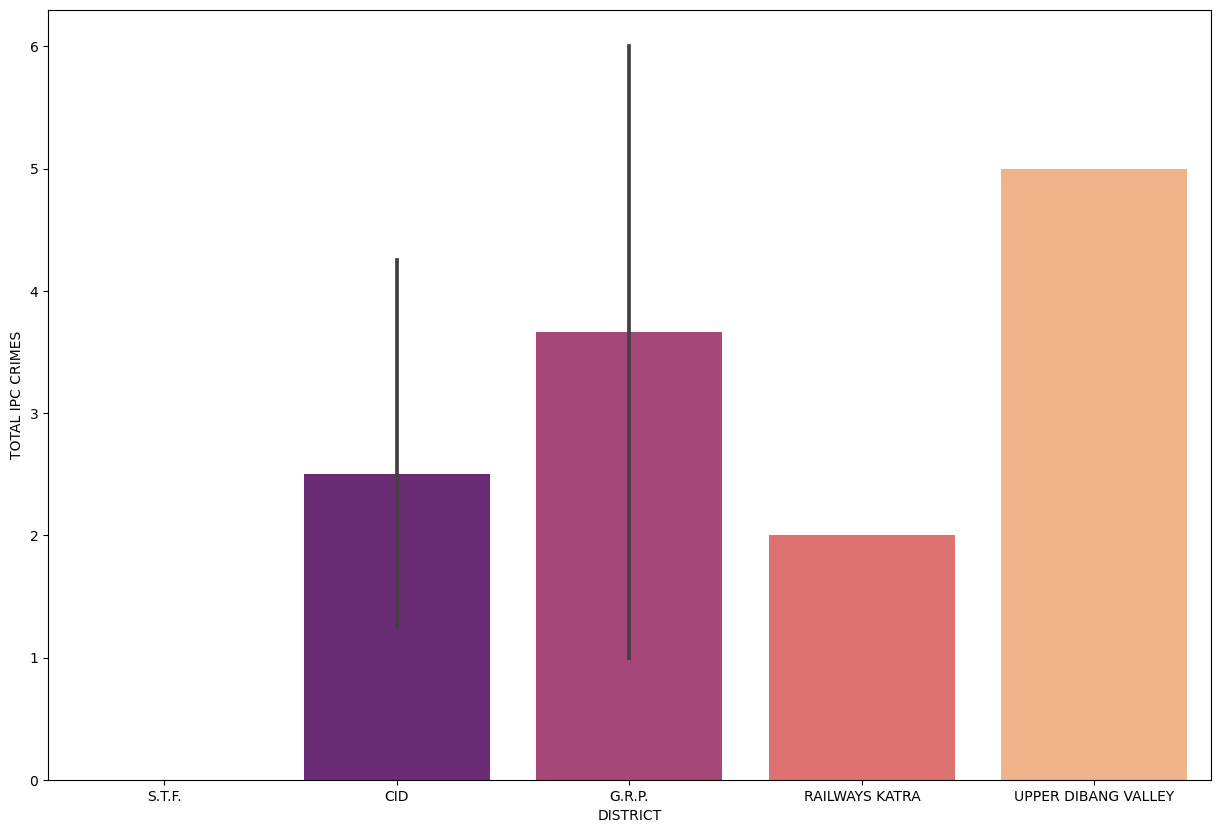

In [43]:
plt.figure(figsize =(15,10))
sns.barplot(x = 'DISTRICT',y = 'TOTAL IPC CRIMES', data = dis.head(10), palette = 'magma')

In [45]:
# Most unsafest District

In [48]:
dis.tail(10)

,TOTAL IPC CRIMES,Area Type,DISTRICT,STATE/UT,0
8437,30508,2,MUMBAI COMMR.,MAHARASHTRA,1
8438,31070,2,MUMBAI COMMR.,MAHARASHTRA,1
8439,31262,2,MUMBAI COMMR.,MAHARASHTRA,1
8440,31432,2,MUMBAI,MAHARASHTRA,1
8441,32188,2,BANGALORE COMMR.,KARNATAKA,1
8442,32380,2,BANGALORE COMMR.,KARNATAKA,1
8443,32647,2,MUMBAI COMMR.,MAHARASHTRA,1
8444,32770,2,MUMBAI COMMR.,MAHARASHTRA,1
8445,33932,2,MUMBAI COMMR.,MAHARASHTRA,1
8446,34638,2,ERNAKULAM RURAL,KERALA,1


<Axes: xlabel='DISTRICT', ylabel='TOTAL IPC CRIMES'>

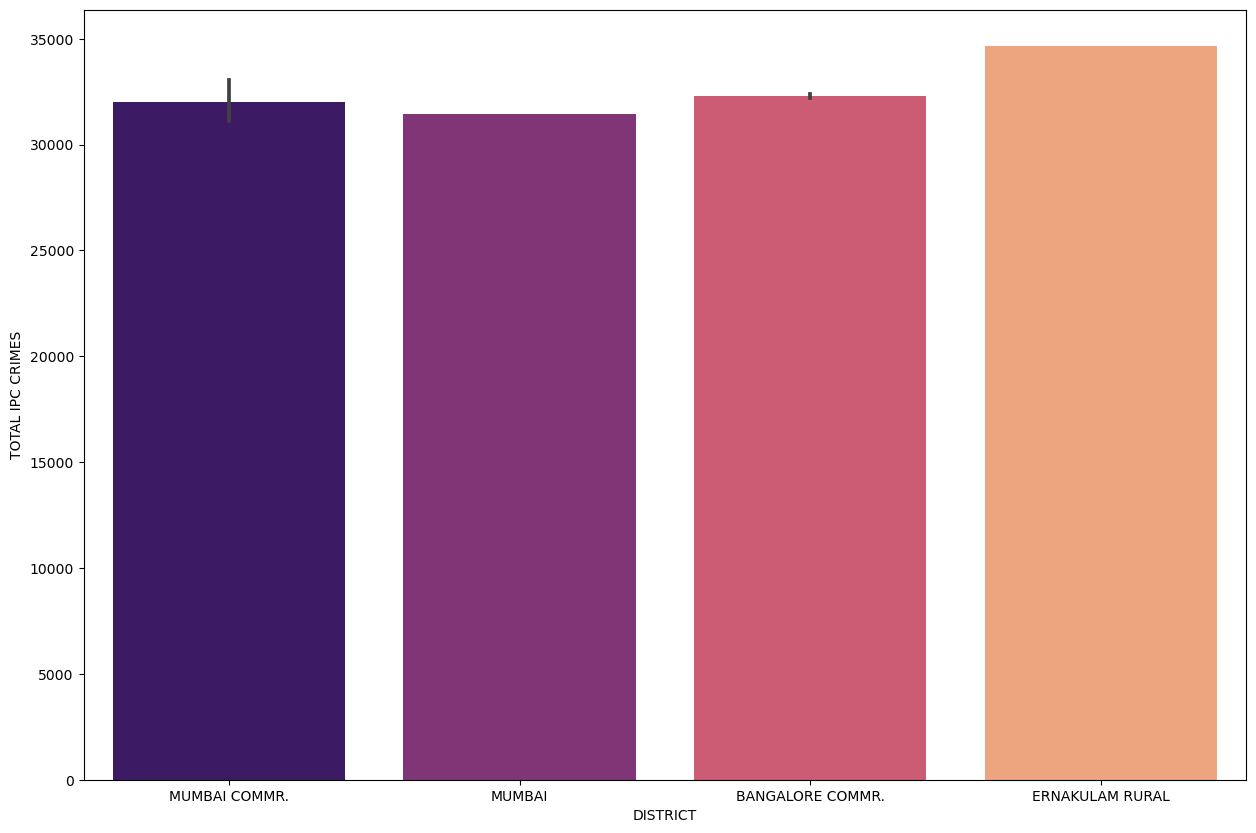

In [46]:
plt.figure(figsize =(15,10))
sns.barplot(x = 'DISTRICT',y = 'TOTAL IPC CRIMES', data = dis.tail(10), palette = 'magma')

* The top 10 safest and most dangerous areas' crime rates are shown by this investigation. In order to create focused strategies for crime prevention and community safety, law enforcement organizations, legislators, and communities must have a thorough understanding of the peculiarities of these districts. Furthermore, a more thorough examination that takes socioeconomic and demographic variables into account can offer a comprehensive knowledge of the dynamics of crime in these areas.

* Since criminal behavior is frequently impacted by a combination of human, societal, economic, and environmental factors, understanding the motivations behind criminal activity is a complex process that entails taking into account many factors.

**4.4 Capstone project overall story in your own words. Min 1000 words.**

* With a population of more than 1.38 billion, India is a diversified nation where crime is a major problem that impacts its people. Based on information provided by the National Crime Records Bureau (NCRB), there were 2.27 million recorded criminal cases in India in 2011. This is a 4.54% drop from the previous year.

* In India, crimes against women—such as rape, sexual harassment, and domestic abuse—remain a serious concern. Of the 2,13,949 recorded cases of crimes against women in 2011, 11.04% had a sexual assault or rape component. In India, crimes against women continue to be a persistent issue despite the implementation of tougher legislation and greater public awareness.

* In India, crimes against minors like as rape, kidnapping and abduction, murder, trafficking, and female importation continue to be the main causes of worry. Of the 33,049 registered incidents of crimes against children in 2011, 21.51% involved rape or sexual assault, while 46.24% of the cases exclusively involved murder among other crimes against children.Even with the implementation of more legislation and more stringent law enforcement measures to combat child abuse, there was a 254.86% increase in child offenses between 2001 and 2011.

* Over the years, Madhya Pradesh has recorded the highest number of cases—40,217—followed by Uttar Pradesh and Maharastra, with 29,969 and 27,845, respectively.33,718 lawsuits against the SC were registered in 2011.

* Juvenile involvement is likewise viewed as a major threat to society.Children who are misled or misdirected frequently have a tendency to make poor decisions. Stricter legislation should be created to address this problem because it is simple to affect them.In 2001, a total of 23,597 instances were reported; in 2011, that number rose to 27,471.With 61,939 cases, Madhya Pradesh has the highest number of cases, while Manipur has the lowest number.

* Police abuse of human rights accounts for a large portion of all IPCC crimes.With 664 offenses registered, 2009 has the highest number of cases ever.Between 2001 and 2011, there was an 82.815% decline in the number of instances.From 2001 to 2011, Chattisgarh recorded the highest number of human rights violations among all the states.

* It's also crucial to remember that individuals tasked with upholding state law and order, like as the police department, have seen assaults from violent mobs, radicals, counterinsurgency forces, border operations, and many other groups.Between 2001 and 2011, Uttar Pradesh registered 2150 instances; Jammu Kashmir, with 1142.0 cases overall, is ranked fourth.From 2001 to 2011, there was an almost 5% increase in cases.There has been a noticeable decline in the number of assaults and killings of police and army personnel in Jammu and Kashmir. From 300 instances in 2001 to 50 cases in 2010, there was a straight decrease of 83.33% in the number of cases.

* The states with the highest combined counts of DACOITY/ROBBERY/BURGALARY/THEFT instances were Uttar Pradesh, Madhya Pradesh, and Maharashtra (7,17,452 and 3,89,927, respectively).-3,66,166. All things considered, even if the number of crimes reported in India has increased, there are still a lot of serious issues that need to be resolved. The government must keep up its initiatives to enhance public awareness, strengthen law enforcement, and address socioeconomic issues that fuel crime.
